In [38]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.4


In [39]:
import pandas as pd

### 1. Versuch

In [121]:
file = open("Dataframe_bereinigt_blockuebergreifend.csv", mode="r")
df=pd.read_csv(file)
df.set_index("Unnamed: 0").head(5)

,Datum,Geschäft,Einreichender 1,Partei 1,Block 1,Einreichender 2,Partei 2,Block 2,Departement
Unnamed: 0,,,,,,,,,
0,25.11.2009,2009/562,Kurt Hüssy,SVP,rechts,Peter Anderegg,EVP,mitte,Polizeidepartement (PD)
1,16.05.2013,2005/550,Mario Mariani,CVP,mitte,Muriel Herzig,Grüne,links,NaN
2,31.10.2018,2018/413,Ernst Danner,EVP,mitte,Raphael Kobler,FDP,rechts,NaN
3,1.12.2004,2004/637,Corine Mauch,SP,links,Albert Leiser,FDP,rechts,NaN
4,19.09.2018,2018/361,Matthias Probst,Grüne,links,Guido Hüni,GLP,mitte,Stadtrat


In [122]:
Netz = nx.Graph()

In [123]:
len(df)

406

In [124]:
for a in range(0,(len(df)-1)):
    Punkt1 = str(df.loc[a]["Einreichender 1"] + ", " + df.loc[a]["Partei 1"])
    Punkt2 = str(df.loc[a]["Einreichender 2"] + ", " + df.loc[a]["Partei 2"])
    Netz.add_edge(Punkt1, Punkt2)

In [125]:
Netz

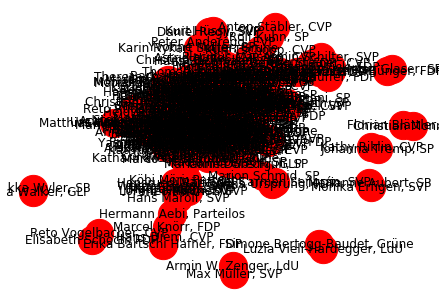

In [126]:
nx.draw(Netz, node_size=800, node_color='red', with_labels=True)

In [127]:
nx.write_gexf(Netz, "Politikerpaare.gexf")

### Auswertungen

In [128]:
from operator import itemgetter

#Knoten die mehrere Personen verbinden, oder oft dazwischen liegen haben eine hohe Betweenness.
bet = nx.betweenness_centrality(Netz)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Ernst Danner, EVP', 0.2315617681159146),
 ('Robert Schönbächler, CVP', 0.17931504553114727),
 ('Albert Leiser, FDP', 0.1536824260136424),
 ('Peter Stähli-Barth, SP', 0.14638774261699578),
 ('Mario Mariani, CVP', 0.11477387179809179),
 ('Marco Denoth, SP', 0.09748590915277808),
 ('Bruno Sidler, SVP', 0.09529737206085753),
 ('Köbi Möri, Parteilos', 0.09031811894882434),
 ('Bernhard Piller, Grüne', 0.0883116913643483),
 ('Daniel Leupi, Grüne', 0.08793412777524785),
 ('Marlène Butz, SP', 0.07609524527153202),
 ('Monika Bloch Süss, CSP', 0.0738111960811109),
 ('Ann-Catherine Nabholz, GLP', 0.06690253325919486),
 ('Isabel Garcia, GLP', 0.06493049769614863),
 ('Werner Sieg, SP', 0.06388218982876658),
 ('Christian Traber, CVP', 0.06074500537042379),
 ('Roger Tognella, FDP', 0.05873069532551986),
 ('Guido Trevisan, GLP', 0.05391394051099442),
 ('Alexander Jäger, FDP', 0.05311755137399379),
 ('Markus Knauss, Grüne', 0.05097341546428501),
 ('Markus Merki, GLP', 0.05003870344372762),
 ('Walter 

In [130]:
#gewichtete Zentralität – basierend auf der Idee, dass Knoten mit hohen Gewichten auch viel zur Zentrelität beitragen
eig = nx.eigenvector_centrality(Netz)
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('Robert Schönbächler, CVP', 0.38125429867268257),
 ('Albert Leiser, FDP', 0.33087622123400373),
 ('Daniel Leupi, Grüne', 0.29547800313378614),
 ('Ernst Danner, EVP', 0.2828614928727499),
 ('Mario Mariani, CVP', 0.2744120452574391),
 ('Bernhard Piller, Grüne', 0.22009165322151292),
 ('Alexander Jäger, FDP', 0.17515175896206756),
 ('Pierino Cerliani, Grüne', 0.15638228382920752),
 ('Niklaus Scherr, AL', 0.14966213561501554),
 ('Marco Denoth, SP', 0.13726897718479683),
 ('Roger Tognella, FDP', 0.12975992698363153),
 ('Gerold Lauber, CVP', 0.12711970105103698),
 ('Christian Traber, CVP', 0.1225439000202976),
 ('Bastien Girod, Grüne', 0.12195471033326456),
 ('Heinz F. Steger, FDP', 0.11625227984018312),
 ('Beatrice Reimann, SP', 0.11201867500521373),
 ('Corine Mauch, SP', 0.10352232188472048),
 ('Christine Seidler, SP', 0.09830565651625779),
 ('Ann-Catherine Nabholz, GLP', 0.09752696972597345),
 ('Pascal Lamprecht, SP', 0.09556008849615084),
 ('Guido Trevisan, GLP', 0.09149973027959556),


In [137]:
import pandas as pd
import seaborn as sns  #Seaborn ist Visualisierungspaket für Pandas

centrality_measures = {
    #'degree': degc,
    'betweenness': bet,
    #'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality.sort_values(by="eigenvector", ascending=False).head(20)

,betweenness,eigenvector
"Robert Schönbächler, CVP",0.179315,0.381254
"Albert Leiser, FDP",0.153682,0.330876
"Daniel Leupi, Grüne",0.087934,0.295478
"Ernst Danner, EVP",0.231562,0.282861
"Mario Mariani, CVP",0.114774,0.274412
"Bernhard Piller, Grüne",0.088312,0.220092
"Alexander Jäger, FDP",0.053118,0.175152
"Pierino Cerliani, Grüne",0.034288,0.156382
"Niklaus Scherr, AL",0.002695,0.149662
"Marco Denoth, SP",0.097486,0.137269


In [132]:
sns.pairplot(centrality)

NameError: name 'centrality' is not defined

### 2. Etwas raffinierterer Anlauf
Jetzt wollen wir...
- die nodes mit einer Partei versehen
- die edges mit einem Datum und einem Departement

In [61]:
#dazu brauchen datetime:
from datetime import datetime

In [62]:
file = open("Dataframe_bereinigt_parteiuebergreifend.csv", mode="r")
df2=pd.read_csv(file)
df2 = df2.set_index("Unnamed: 0")

In [120]:
#WIr beschränken uns, das Jahr hier rauszuholen, weil es in der Datumszeile Fehle hat:
df2["Jahr"] = df2["Geschäft"]
df2["Jahr"] = df2["Jahr"].apply(lambda x: x.split("/")[0])
df2["Jahr"]= pd.to_datetime(df2["Jahr"], format="%Y")
df2

,Datum,Geschäft,Einreichender 1,Partei 1,Einreichender 2,Partei 2,Departement,Jahr
Unnamed: 0,,,,,,,,
0,25.11.2009,2009/562,Kurt Hüssy,SVP,Peter Anderegg,EVP,Polizeidepartement (PD),2009-01-01
1,21.8.2002,2002/289,Markus Schwyn,PFZ,Monika Erfigen,SVP,Hochbaudepartement (HBD),2002-01-01
2,3.5.2006,2006/134,Richard Rabelbauer,EVP,Robert Schönbächler,CVP,Departement der Industriellen Betriebe (DIB),2006-01-01
3,26.05.2010,2008/16,Rebekka Wyler,SP,Pierino Cerliani,Grüne,NaN,2008-01-01
4,30.8.2000,2000/415,Markus Schwyn,PFZ,Mauro Tuena,SVP,Sozialdepartement (SD),2000-01-01
...,...,...,...,...,...,...,...,...
953,9.1.2008,2008/3,Joe A. Manser,SP,Mario Mariani,CVP,Präsidialdepartement (PRD),2008-01-01
954,9.7.1997,1997/284,Silvio Scotoni,FDP,Peter Marti,FDP,Polizeidepartement (PD),1997-01-01
955,7.4.2004,2004/202,Alecs Recher,AL,Muriel Herzig,Grüne,Sozialdepartement (SD),2004-01-01


In [110]:
#Als erstes ziehen wir die Personen as knodes raus und verleiehen ihnen das Attribut "Partei"

Netz2 = nx.Graph()
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Partei1 = str(df2.loc[a]["Partei 1"])
    Partei2 = str(df2.loc[a]["Partei 2"])
    Netz2.add_node(Person1, Partei = Partei1)
    Netz2.add_node(Person2, Partei = Partei2)

In [98]:
#Test:
Netz2.nodes.data()

NodeDataView({'Kurt Hüssy': {'Partei': 'SVP'}, 'Peter Anderegg': {'Partei': 'EVP'}, 'Markus Schwyn': {'Partei': 'PFZ'}, 'Monika Erfigen': {'Partei': 'SVP'}, 'Richard Rabelbauer': {'Partei': 'EVP'}, 'Robert Schönbächler': {'Partei': 'CVP'}, 'Rebekka Wyler': {'Partei': 'SP'}, 'Pierino Cerliani': {'Partei': 'Grüne'}, 'Mauro Tuena': {'Partei': 'SVP'}, 'Mario Mariani': {'Partei': 'CVP'}, 'Muriel Herzig': {'Partei': 'Grüne'}, 'Susi Gut': {'Partei': 'PFZ'}, 'Roger Liebi': {'Partei': 'SVP'}, 'Ezgi Akyol': {'Partei': 'AL'}, 'Anjushka Früh': {'Partei': 'SP'}, 'Ernst Danner': {'Partei': 'EVP'}, 'Raphael Kobler': {'Partei': 'FDP'}, 'Corine Mauch': {'Partei': 'SP'}, 'Albert Leiser': {'Partei': 'FDP'}, 'Matthias Probst': {'Partei': 'Grüne'}, 'Guido Hüni': {'Partei': 'GLP'}, 'Köbi Möri': {'Partei': 'Parteilos'}, 'Hansruedi Bär': {'Partei': 'SVP'}, 'Cäcilia Hänni-Etter': {'Partei': 'FDP'}, 'Markus Hungerbühler': {'Partei': 'CVP'}, 'Katrin Schönenberger-Meier': {'Partei': 'EVP'}, 'Thomas  Kappeler': {'

In [99]:
#irgendwie frisst er das Partei-Attribut nicht.
Netz2["Kurt Hüssy"]

AtlasView({})

In [100]:
#Als zweites machen wir die edges und versehen sie mit eindem datetime-Datum:
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Jahr = str(df2.loc[a]["Jahr"])
    Departement = str(df2.loc[a]["Departement"])
    
    #Beziehungen, die mehrmals vorkommen, sollte gewichtet werden (weight +1)
    if Netz2.has_edge(Person1, Person2):
        Netz2[Person1][Person2]["weight"] += 1
    else:
        Netz2.add_edge(Person1, Person2, timestamp = Jahr, thema = Departement, weight=1)

In [101]:
print(nx.info(Netz2))

Name: 
Type: Graph
Number of nodes: 339
Number of edges: 636
Average degree:   3.7522


In [102]:
#scheint zu funktionieren!
Netz2.edges["Susi Gut", "Roger Bartholdi"]['weight']

3

In [103]:
#Problem: Wenn die mehrmals in versch. Departementen zusammengearbeitet haben, wird nur ein Wert mitgeliefert...
Netz2.edges["Susi Gut", "Roger Bartholdi"]['thema']

'Gesundheits- und Umweltdepartement (GUD)'

In [104]:
#Und speichern:
nx.write_gexf(Netz, "Politikerpaare_raffiniert.gexf")

# Problem:
Wenn man das Ergebnis als Textfile öffnet, sieht man, dass die Labels als solche verschwunden sind. Hier ist die Erklärung dafür: 

The node id attribute is set to be the string of the node label. If you want to specify an id use set it as node data, e.g. node[‘a’][‘id’]=1 to set the id of node ‘a’ to 1.

Aber wie lösen wir das???

In [111]:
Netz2.nodes["Susi Gut"]

{'Partei': 'PFZ'}

In [108]:
Netz2.nodes["Susi Gut"]["Partei"]="Test PFZ"

### Achtung, für Gephi...
... ist das weighten evtl. unnötig, macht das Programm selbst beim Import. Deshalb alles mal noch ohne:

In [24]:
file = open("Dataframe_bereinigt_parteiuebergreifend.csv", mode="r")
df2=pd.read_csv(file)
df2 = df2.set_index("Unnamed: 0")

df2["Jahr"] = df2["Geschäft"]
df2["Jahr"] = df2["Jahr"].apply(lambda x: x.split("/")[0])
df2["Jahr"]= pd.to_datetime(df2["Jahr"], format="%Y")

Netz2 = nx.Graph()
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Partei1 = str(df2.loc[a]["Partei 1"])
    Partei2 = str(df2.loc[a]["Partei 2"])
    Netz2.add_node(Person1, Partei = Partei1)
    Netz2.add_node(Person2, Partei = Partei2)

#Als zweites machen wir die edges und versehen sie mit eindem datetime-Datum:
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Jahr = str(df2.loc[a]["Jahr"])
    Departement = str(df2.loc[a]["Departement"])
    
    Netz2.add_edge(Person1, Person2, timestamp = Jahr, thema = Departement)
    
nx.write_gexf(Netz, "Politikerpaare_for_gephi.gexf")


In [25]:
print(nx.info(Netz2))

Name: 
Type: Graph
Number of nodes: 339
Number of edges: 636
Average degree:   3.7522


### Noch ein Versuch mit weighted edges
add_weighted_edges_from<br>
Notes: Adding the same edge twice for Graph/DiGraph simply updates the edge data. 

In [117]:
file = open("Dataframe_bereinigt_parteiuebergreifend.csv", mode="r")
df2=pd.read_csv(file)
df2 = df2.set_index("Unnamed: 0")

df2["Jahr"] = df2["Geschäft"]
df2["Jahr"] = df2["Jahr"].apply(lambda x: x.split("/")[0])
df2["Jahr"]= pd.to_datetime(df2["Jahr"], format="%Y")

Netz2 = nx.Graph()
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Partei1 = str(df2.loc[a]["Partei 1"])
    Partei2 = str(df2.loc[a]["Partei 2"])
    Netz2.add_node(Person1, Partei = Partei1)
    Netz2.add_node(Person2, Partei = Partei2)

#Als zweites machen wir die edges und versehen sie mit eindem datetime-Datum:
for a in range(0,(len(df2)-1)):
    Person1 = str(df2.loc[a]["Einreichender 1"])
    Person2 = str(df2.loc[a]["Einreichender 2"])
    Jahr = str(df2.loc[a]["Jahr"])
    Departement = str(df2.loc[a]["Departement"])
    
    Netz2.add_weighted_edges_from(Person1, Person2)
    
nx.write_gexf(Netz, "Politikerpaare_for_gephi2.gexf")

ValueError: not enough values to unpack (expected 3, got 1)